In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from textwrap import wrap
import numpy as np

In [2]:
trump_dataset = pd.read_csv('hashtag_donaldtrump.csv', encoding='latin_1', lineterminator='\n')
biden_dataset = pd.read_csv('hashtag_joebiden.csv', encoding='latin_1', lineterminator='\n')

trump_dataset.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - Ø±ÙØ§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [3]:
trump_dataset['reference'] = 'trump'
biden_dataset['reference'] = 'biden'

dataset = pd.concat([trump_dataset, biden_dataset])

dataset = dataset.drop(columns = ['collected_at', 'tweet_id', 'source', 'user_name', 'user_screen_name', 'user_description', 'user_join_date'])

dataset.sort_values(by='created_at')

dataset.head(20)

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,reference
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,3.606665e+08,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,trump
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,3.316176e+08,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,8.436472e+06,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,trump
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,8.283556e+17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,4.741380e+07,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,trump
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,1.138416e+09,2363.0,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,trump
6,2020-10-15 00:00:17,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,7.674018e+17,75.0,"Powell, TN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,9.007611e+17,766.0,"Ohio, USA",40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,trump
8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,5.404769e+08,151.0,"Pennsylvania, USA",40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,trump
9,2020-10-15 00:00:21,#Election2020 #Trump \n#FreedomOfSpeech https:...,0.0,0.0,1.305533e+18,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump


# Number of tweets by country

In [4]:
# Get each country
countries = dataset['country'].unique()

In [5]:
# Create an empty dataframe array with column country and number_of_tweets
countries_dataset = pd.DataFrame(columns=['country', 'number_of_tweets', 'number_of_tweets_biden', 'number_of_tweets_trump'])

# Populate the array
for country in countries:
    tmp_dataset_country = dataset.loc[(dataset['country'] == country)]
    countries_dataset = countries_dataset.append({
        'country': country,
        'number_of_tweets': len(tmp_dataset_country),
        'number_of_tweets_biden': (tmp_dataset_country['reference'] == 'biden').sum(),
        'number_of_tweets_trump': (tmp_dataset_country['reference'] == 'trump').sum(),
    }, ignore_index=True)

# Take just the first 10 country
countries_dataset = countries_dataset.sort_values(by='number_of_tweets', ascending=False)
countries_dataset = countries_dataset[:11]

# Merge United states and United states of america
nb_tweets_united_states = countries_dataset[countries_dataset['country'] == 'United States']['number_of_tweets']
nb_tweets_united_states_of_america = countries_dataset[countries_dataset['country'] == 'United States of America']['number_of_tweets']

countries_dataset.loc[countries_dataset['country'] == 'United States of America', 'number_of_tweets'] = int(nb_tweets_united_states) + int(nb_tweets_united_states_of_america)

countries_dataset = countries_dataset[countries_dataset['country'] != 'United States']

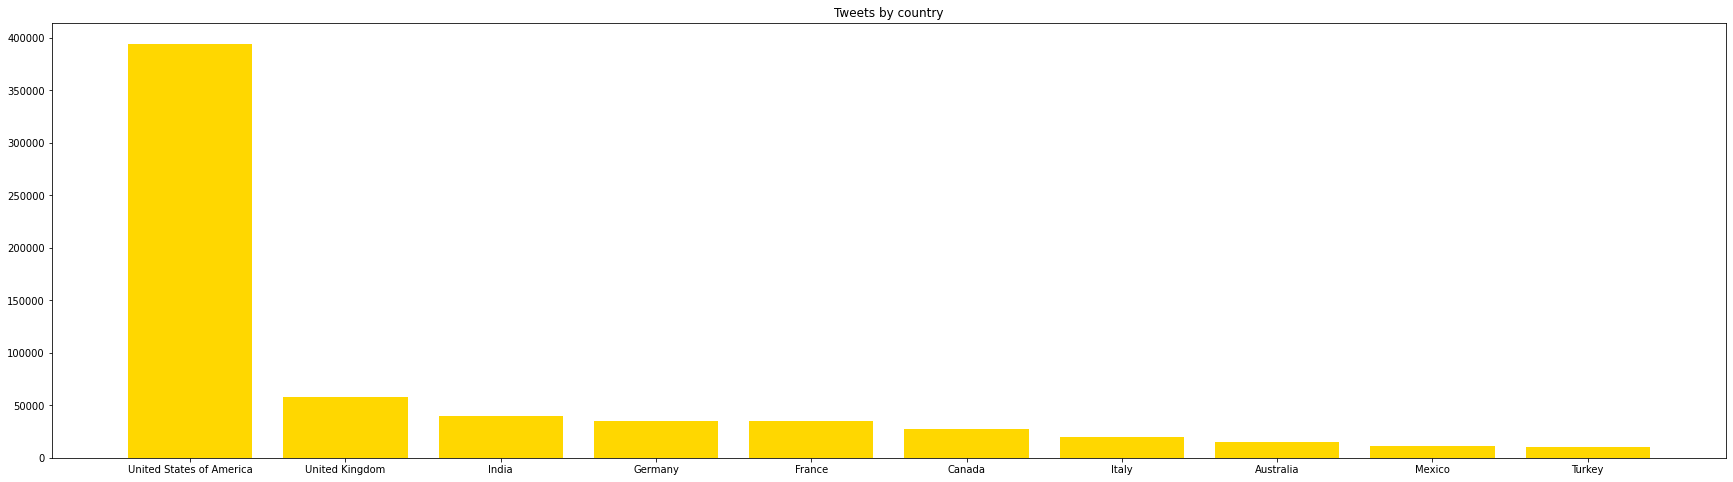

In [6]:
x = countries_dataset['country'].tolist()

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(30,8))
plt.bar(x_pos, countries_dataset['number_of_tweets'].tolist(), width=0.8, color='gold')

plt.xticks(x_pos, x)
plt.title("Tweets by country")

plt.show()

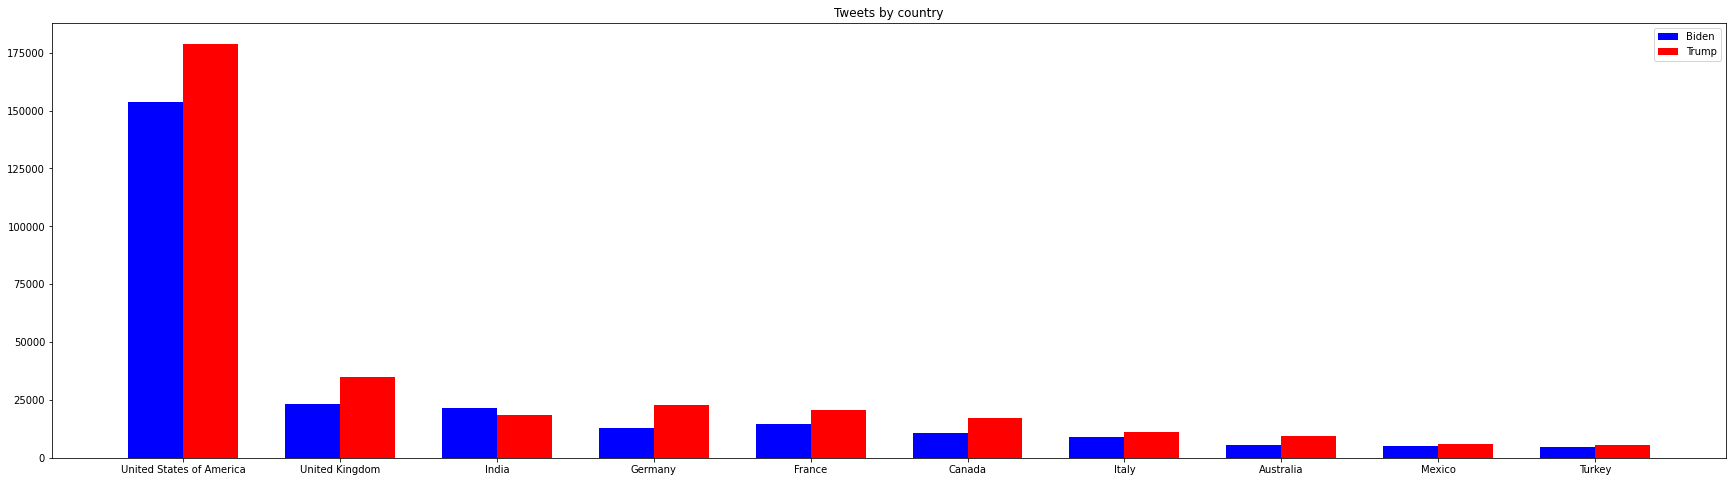

In [7]:
# Display the number of tweets by hashtag and by country
x = countries_dataset['country'].tolist()

x_pos = np.arange(len(x))
width = 0.35

plt.figure(figsize=(30,8))
plt.bar(x_pos, countries_dataset['number_of_tweets_biden'].tolist(), width=width, color="blue", label="Biden")
plt.bar(x_pos + width, countries_dataset['number_of_tweets_trump'].tolist(), width=width, color='red', label="Trump")

plt.xticks(x_pos + width / 2, x)
plt.title("Tweets by country")
plt.legend()

plt.show()